# XG boost modelling by month for Time Series Store forecast 
* By Alex Dance https://www.linkedin.com/in/alex-dance/
* This notebook is one of several notebooks for a project to improve store and product forecasts
1.	EDA – Exploratory Data Analysis – includes working with annual forecasts
2.	Main Modelling
3.	XG Boost modelling by Month
4.	Weighted average
5.	ARIMA – Month and Other Modelling
6.	Deep Learning

* This workbook is XG Boost for further forecasts 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier


In [3]:
df = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
split = "2017-01-01"

In [5]:
df['date'] =  pd.to_datetime(df['date'])

# Set Date as Index

In [6]:
df = df.set_index('date')

In [7]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


# Test and Train

In [8]:
df_XG = df.groupby('store').resample('M')['sales'].sum()

In [9]:
df_XG_store_item = df.groupby(['store','item'])['sales'].resample('M').sum()

In [10]:
df_XG.head()

store  date      
1      2013-01-31    41077
       2013-02-28    41306
       2013-03-31    55827
       2013-04-30    61523
       2013-05-31    69272
Name: sales, dtype: int64

In [11]:
df_XG_store_item.tail()

store  item  date      
10     50    2017-08-31    2867
             2017-09-30    2586
             2017-10-31    2507
             2017-11-30    2574
             2017-12-31    1987
Name: sales, dtype: int64

In [12]:
df_XG.head()

store  date      
1      2013-01-31    41077
       2013-02-28    41306
       2013-03-31    55827
       2013-04-30    61523
       2013-05-31    69272
Name: sales, dtype: int64

In [13]:
df_XG_store_item.head()

store  item  date      
1      1     2013-01-31    328
             2013-02-28    322
             2013-03-31    477
             2013-04-30    522
             2013-05-31    531
Name: sales, dtype: int64

In [14]:
df_XG_store_item.tail()

store  item  date      
10     50    2017-08-31    2867
             2017-09-30    2586
             2017-10-31    2507
             2017-11-30    2574
             2017-12-31    1987
Name: sales, dtype: int64

In [15]:
df_XG = df_XG.reset_index()

In [16]:
df_XG.head()

,store,date,sales
0,1,2013-01-31,41077
1,1,2013-02-28,41306
2,1,2013-03-31,55827
3,1,2013-04-30,61523
4,1,2013-05-31,69272


In [17]:
df_XG_store_item= df_XG_store_item.reset_index() 

In [18]:
df_XG_store_item.head()

,store,item,date,sales
0,1,1,2013-01-31,328
1,1,1,2013-02-28,322
2,1,1,2013-03-31,477
3,1,1,2013-04-30,522
4,1,1,2013-05-31,531


In [19]:
df_XG = df_XG.set_index('date')

In [20]:
df_XG_store_item = df_XG_store_item.set_index('date')

In [21]:
df_XG_store_item.tail()

,store,item,sales
date,,,
2017-08-31,10,50,2867
2017-09-30,10,50,2586
2017-10-31,10,50,2507
2017-11-30,10,50,2574
2017-12-31,10,50,1987


In [22]:
df_XG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2013-01-31 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   600 non-null    int64
 1   sales   600 non-null    int64
dtypes: int64(2)
memory usage: 14.1 KB


In [23]:
df_XG['month'] =df_XG.index.month
df_XG['year'] = df_XG.index.year


In [24]:
df_XG_store_item['month'] =df_XG_store_item.index.month
df_XG_store_item['year'] = df_XG_store_item.index.year


In [25]:
df_XG.head()

,store,sales,month,year
date,,,,
2013-01-31,1,41077,1,2013
2013-02-28,1,41306,2,2013
2013-03-31,1,55827,3,2013
2013-04-30,1,61523,4,2013
2013-05-31,1,69272,5,2013


In [26]:
df_train = df_XG[ :split ] 
df_test = df_XG[split : ] 

In [27]:
df_train_SI = df_XG_store_item[ :split ] 
df_test_SI = df_XG_store_item[split : ] 

In [28]:
y_train = df_train.loc[:,'sales']
y_test= df_test.loc[:,'sales']
X_train = df_train.drop (['sales'],axis=1) # ask ammar
X_test = df_test.drop (['sales'],axis=1)

In [29]:
y_train_SI = df_train_SI.loc[:,'sales']
y_test_SI= df_test_SI.loc[:,'sales']
X_train_SI = df_train_SI.drop (['sales'],axis=1) # ask ammar
X_test_SI = df_test_SI.drop (['sales'],axis=1)

In [30]:
y_train_SI.tail()

date
2016-08-31    2842
2016-09-30    2568
2016-10-31    2495
2016-11-30    2581
2016-12-31    1922
Name: sales, dtype: int64

In [31]:
X_test_SI.tail()

,store,item,month,year
date,,,,
2017-08-31,10,50,8,2017
2017-09-30,10,50,9,2017
2017-10-31,10,50,10,2017
2017-11-30,10,50,11,2017
2017-12-31,10,50,12,2017


# XG Boost by Month

In [32]:
df_XG_month= df.resample('M')['sales'].sum()

In [33]:
df_XG_month = df_XG_month.reset_index()

In [34]:
df_XG_month['year'] = df_XG_month['date'].dt.year

In [35]:
df_XG_month = df_XG_month.set_index('date')

In [36]:
df_train_month = df_XG_month[ :split ] 
df_test_month = df_XG_month[split : ] 

In [37]:
df_train_month.head()

,sales,year
date,,
2013-01-31,454904,2013
2013-02-28,459417,2013
2013-03-31,617382,2013
2013-04-30,682274,2013
2013-05-31,763242,2013


In [38]:
y_train_month = df_train_month.loc[:,'sales']
y_test_month= df_test_month.loc[:,'sales']
X_train_month = df_train_month.drop (['sales'],axis=1) # ask ammar
X_test_month = df_test_month.drop (['sales'],axis=1)

In [39]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)

In [40]:
XG_model_month.fit(X_train_month, y_train_month,eval_set=[(X_test_month, y_test_month)], early_stopping_rounds=50,verbose=False) # Change verbose to True to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

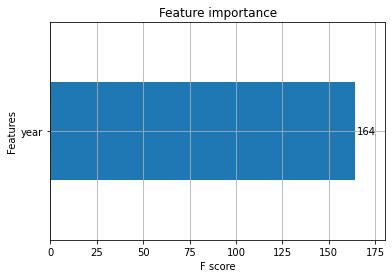

In [41]:
_ = plot_importance(XG_model_month, height=0.9)

In [42]:
XG_test_prediction = XG_model_month.predict(X_test_month)

In [43]:
print(XG_test_prediction)

[863096.56 863096.56 863096.56 863096.56 863096.56 863096.56 863096.56
 863096.56 863096.56 863096.56 863096.56 863096.56]


In [44]:
# You can see by looking at the results that this is a terrible forecast as there are not enough features

# XG Boost on Store by Month

In [45]:
XG_model = xgb.XGBRegressor(n_estimators=1000)

In [46]:
X_test.head()

,store,month,year
date,,,
2017-01-31,1,1,2017
2017-02-28,1,2,2017
2017-03-31,1,3,2017
2017-04-30,1,4,2017
2017-05-31,1,5,2017


In [47]:
y_test.head()

date
2017-01-31    56086
2017-02-28    56098
2017-03-31    74037
2017-04-30    85338
2017-05-31    92248
Name: sales, dtype: int64

In [48]:
%%time
XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False) # Change verbose to True to see it train

Wall time: 1.48 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

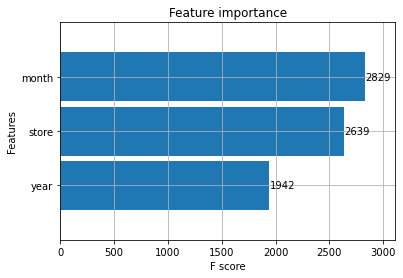

In [49]:
_ = plot_importance(XG_model, height=0.9)

In [50]:
XG_test_prediction = XG_model.predict(X_test)

In [51]:
XG_test_all =X_test.copy()
XG_train_all =X_train.copy()
XG_test_all['XG prediction'] = XG_model.predict(X_test)
XG_train_all['XG prediction'] =XG_model.predict(X_train)
XG_test_all['sales'] = y_test
XG_train_all['sales'] = y_train
df_xg_all = pd.concat([XG_test_all, XG_train_all], sort=False)

In [52]:
XG_test_all.sum()

store            6.600000e+02
month            7.800000e+02
year             2.420400e+05
XG prediction    1.035722e+07
sales            1.073374e+07
dtype: float64

In [53]:
X_train.head()

,store,month,year
date,,,
2013-01-31,1,1,2013
2013-02-28,1,2,2013
2013-03-31,1,3,2013
2013-04-30,1,4,2013
2013-05-31,1,5,2013


In [54]:
df_xg_all.head()

,store,month,year,XG prediction,sales
date,,,,,
2017-01-31,1,1,2017,54565.320312,56086
2017-02-28,1,2,2017,55722.464844,56098
2017-03-31,1,3,2017,71548.890625,74037
2017-04-30,1,4,2017,81560.453125,85338
2017-05-31,1,5,2017,89514.039062,92248


In [55]:
y_train.head()

date
2013-01-31    41077
2013-02-28    41306
2013-03-31    55827
2013-04-30    61523
2013-05-31    69272
Name: sales, dtype: int64

In [56]:
df_xg_all.sample(10)

,store,month,year,XG prediction,sales
date,,,,,
2013-02-28,2,2,2013,59182.343750,59384
2016-09-30,8,9,2016,109774.687500,109688
2013-03-31,5,3,2013,47115.480469,47082
2015-09-30,7,9,2015,57321.679688,57418
2013-03-31,10,3,2013,69219.765625,69249
2014-01-31,7,1,2014,36862.613281,36891
2017-02-28,7,2,2017,42861.574219,43326
2015-11-30,8,11,2015,101882.601562,101946
2017-03-31,3,3,2017,90424.648438,93857


In [57]:
XG_test_all.describe()

,store,month,year,XG prediction,sales
count,120.000000,120.000000,120.0,120.000000,120.000000
mean,5.500000,6.500000,2017.0,86310.109375,89447.833333
std,2.884324,3.466527,0.0,23706.880859,24684.873723
min,1.000000,1.000000,2017.0,42098.453125,42754.000000
25%,3.000000,3.750000,2017.0,68201.775391,70848.750000
50%,5.500000,6.500000,2017.0,83052.472656,86363.000000
75%,8.000000,9.250000,2017.0,103683.527344,107821.000000
max,10.000000,12.000000,2017.0,146316.187500,150105.000000


In [58]:
XG_train_all.describe()

,store,month,year,XG prediction,sales
count,480.000000,480.000000,480.0000,480.000000,480.000000
mean,5.500000,6.500000,2014.5000,77022.601562,77022.441667
std,2.875278,3.455654,1.1192,22524.570312,22525.058969
min,1.000000,1.000000,2013.0000,31545.054688,31508.000000
25%,3.000000,3.750000,2013.7500,60034.464844,60073.500000
50%,5.500000,6.500000,2014.5000,74452.734375,74429.500000
75%,8.000000,9.250000,2015.2500,93679.041016,93827.250000
max,10.000000,12.000000,2016.0000,146316.187500,146393.000000


In [59]:
XG_test_all['sales'].sum()

10733740

In [60]:
XG_test_all['XG prediction'].sum()

10357216.0

In [61]:
XG_RMSE  = np.mean(np.sqrt((XG_test_all['XG prediction'] - XG_test_all['sales']) ** 2))    

In [62]:
print(XG_RMSE)

3137.7033854166666


In [63]:
XG_test_all.shape

(120, 5)

In [64]:
XG_test_all.head()

,store,month,year,XG prediction,sales
date,,,,,
2017-01-31,1,1,2017,54565.320312,56086
2017-02-28,1,2,2017,55722.464844,56098
2017-03-31,1,3,2017,71548.890625,74037
2017-04-30,1,4,2017,81560.453125,85338
2017-05-31,1,5,2017,89514.039062,92248


In [65]:
df_xg_all.describe()

,store,month,year,XG prediction,sales
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,5.500000,6.500000,2015.000000,78880.132812,79507.520000
std,2.874678,3.454933,1.415394,23047.609375,23484.712007
min,1.000000,1.000000,2013.000000,31545.054688,31508.000000
25%,3.000000,3.750000,2014.000000,61539.993164,62025.000000
50%,5.500000,6.500000,2015.000000,75629.980469,77414.500000
75%,8.000000,9.250000,2016.000000,96562.167969,97127.250000
max,10.000000,12.000000,2017.000000,146316.187500,150105.000000


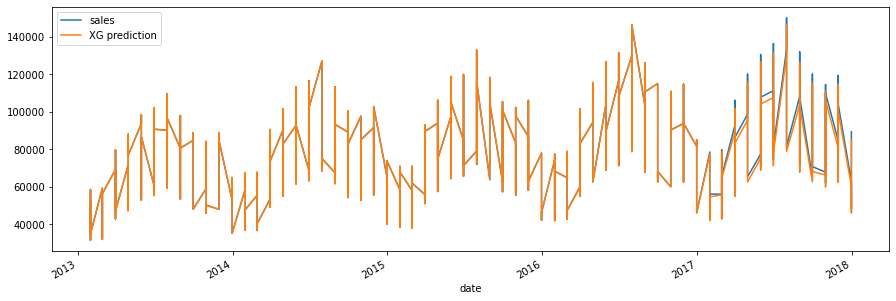

In [66]:
_ = df_xg_all[['sales','XG prediction']].plot(figsize=(15, 5))
# as too many options the plot is not very useful

In [67]:
df_xg_all_1 = df_xg_all[(df_xg_all.store==1)]

In [68]:
df_xg_all_3 = df_xg_all[(df_xg_all.store==3)]

In [69]:
XG_train_all_1 = XG_train_all[(XG_train_all.store==1)]

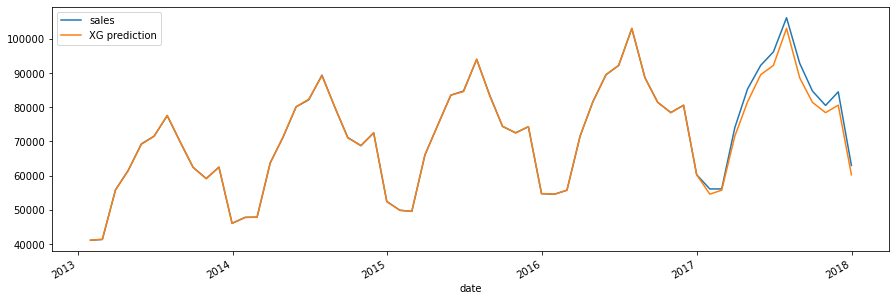

In [70]:
_ = df_xg_all_1[['sales','XG prediction']].plot(figsize=(15, 5))

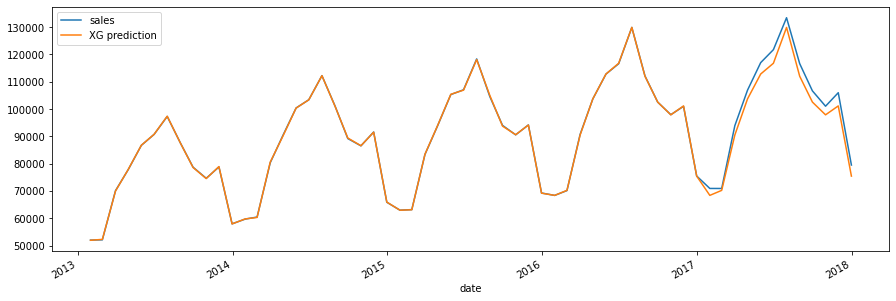

In [71]:
_ = df_xg_all_3[['sales','XG prediction']].plot(figsize=(15, 5))

In [72]:
df_xg_all.sample(10)

,store,month,year,XG prediction,sales
date,,,,,
2016-11-30,4,11,2016,93590.671875,93816
2015-03-31,7,3,2015,51329.273438,51044
2013-02-28,7,2,2013,31913.121094,32021
2013-07-31,3,7,2013,97326.625000,97233
2016-12-31,9,12,2016,69557.164062,69500
2014-01-31,7,1,2014,36862.613281,36891
2016-02-29,1,2,2016,55722.464844,55722
2013-07-31,7,7,2013,59275.894531,59550
2016-08-31,5,8,2016,74718.531250,74652


In [73]:
df_xg_all.head()

,store,month,year,XG prediction,sales
date,,,,,
2017-01-31,1,1,2017,54565.320312,56086
2017-02-28,1,2,2017,55722.464844,56098
2017-03-31,1,3,2017,71548.890625,74037
2017-04-30,1,4,2017,81560.453125,85338
2017-05-31,1,5,2017,89514.039062,92248


# XG by Store and ITEM By Month

In [74]:
X_test_SI.head()

,store,item,month,year
date,,,,
2017-01-31,1,1,1,2017
2017-02-28,1,1,2,2017
2017-03-31,1,1,3,2017
2017-04-30,1,1,4,2017
2017-05-31,1,1,5,2017


In [75]:
XG_model_SI = xgb.XGBRegressor(n_estimators=1000)

In [76]:
%%time
XG_model_SI.fit(X_train_SI, y_train_SI,eval_set=[(X_test_SI, y_test_SI)], early_stopping_rounds=50,verbose=False) # Change verbose to True to see it train
#XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)]

Wall time: 36.9 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

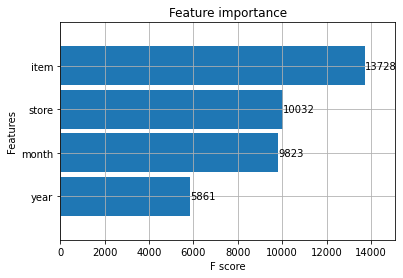

In [77]:
_ = plot_importance(XG_model_SI, height=0.9)

In [78]:
XG_test_prediction_SI = XG_model_SI.predict(X_test_SI)

In [79]:
XG_test_prediction_SI.sum()

10357375.0

In [80]:
XG_SI_test_all =X_test_SI.copy()

In [81]:
XG_SI_train_all =X_train_SI.copy()

In [82]:
XG_SI_test_all['XG prediction'] = XG_model_SI.predict(X_test_SI)

In [83]:
XG_SI_test_all['sales'] = y_test_SI

In [84]:
XG_SI_train_all['sales'] = y_train_SI

In [85]:
XG_SI__RMSE  = np.mean(np.sqrt((XG_SI_test_all['XG prediction'] - XG_SI_test_all['sales']) ** 2)) 

In [86]:
print(XG_SI__RMSE) # This result is very good

68.9455248413086


In [87]:
XG_SI_test_all.shape

(6000, 6)

In [88]:
df_xg_SI_all = pd.concat([XG_SI_test_all, XG_SI_train_all], sort=False)

In [89]:
XG_SI_test_all.sample(10)

,store,item,month,year,XG prediction,sales
date,,,,,,
2017-04-30,10,17,4,2017,1291.921265,1325
2017-12-31,10,45,12,2017,2293.234375,2389
2017-02-28,2,9,2,2017,1507.268433,1590
2017-03-31,4,30,3,2017,1298.975464,1282
2017-01-31,5,47,1,2017,390.766083,402
2017-02-28,1,27,2,2017,490.457764,414
2017-12-31,6,21,12,2017,774.536072,787
2017-07-31,4,9,7,2017,2412.667236,2392
2017-09-30,6,36,9,2017,2010.870361,2095


In [90]:
XG_SI_train_all.sample(3)

,store,item,month,year,sales
date,,,,,
2016-06-30,8,25,6,2016,3944
2016-10-31,1,25,10,2016,2364
2016-12-31,9,49,12,2016,795


In [91]:
df_xg_SI_all.sample(5)

,store,item,month,year,XG prediction,sales
date,,,,,,
2014-06-30,5,35,6,2014,NaN,1836
2015-06-30,10,7,6,2015,NaN,2405
2016-09-30,8,3,9,2016,NaN,1483
2014-08-31,2,18,8,2014,NaN,3568
2015-08-31,7,47,8,2015,NaN,544


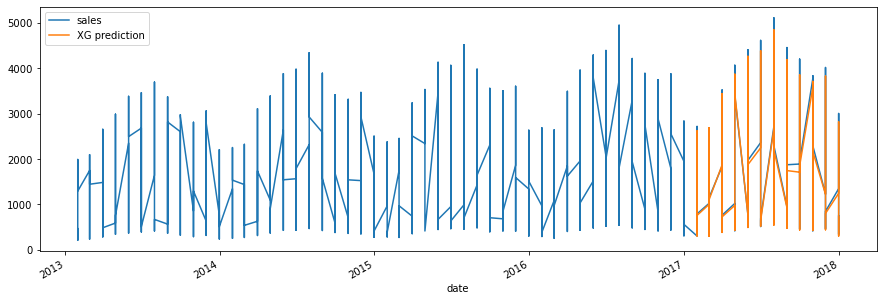

In [92]:
_ = df_xg_SI_all[['sales','XG prediction']].plot(figsize=(15, 5))

In [93]:
df_xg_SI_all_1_1 = df_xg_SI_all[(df_xg_SI_all.store==1)&(df_xg_SI_all.item==1)]

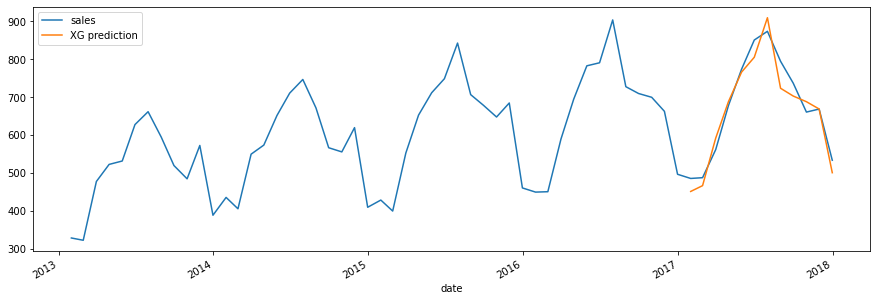

In [94]:
_ = df_xg_SI_all_1_1[['sales','XG prediction']].plot(figsize=(15, 5))

In [95]:
df_xg_SI_all_1_2 = df_xg_SI_all[(df_xg_SI_all.store==1)&(df_xg_SI_all.item==2)]

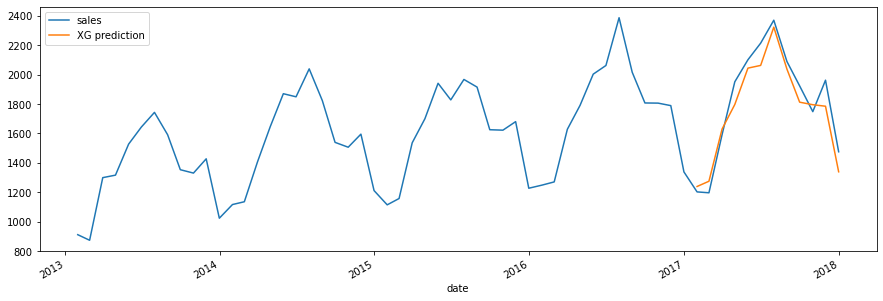

In [96]:
_ = df_xg_SI_all_1_2[['sales','XG prediction']].plot(figsize=(15, 5))

In [97]:
df_xg_SI_all_2_2 = df_xg_SI_all[(df_xg_SI_all.store==2)&(df_xg_SI_all.item==2)]

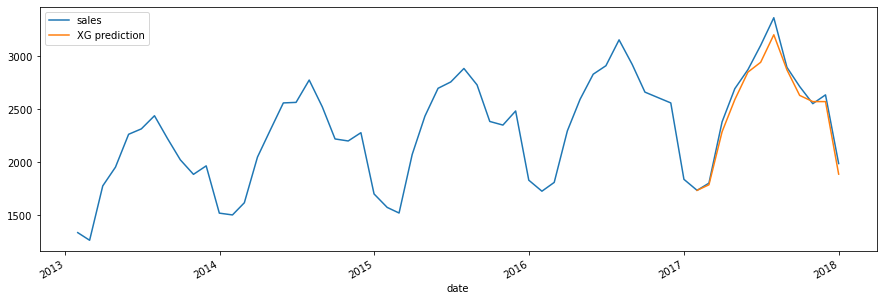

In [98]:
_ = df_xg_SI_all_2_2[['sales','XG prediction']].plot(figsize=(15, 5))

In [99]:
df_xg_SI_all.nunique()

store              10
item               50
month              12
year                5
XG prediction    6000
sales            3653
dtype: int64

In [100]:
df_xg_SI_all.store.value_counts()

10    3000
9     3000
8     3000
7     3000
6     3000
5     3000
4     3000
3     3000
2     3000
1     3000
Name: store, dtype: int64